In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.discrete.discrete_model as sm

In [38]:
data = pd.read_csv("advertising.csv")

In [80]:
data.head(20)

,Tiempo Diario App,Edad,Ingreso,Tiempo Diario Internet,Male,Click AD
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
5,59.99,23,59761.56,226.74,1,0
6,88.91,33,53852.85,208.36,0,0
7,66.00,48,24593.33,131.76,1,1
8,74.53,30,68862.00,221.51,1,0
9,69.88,20,55642.32,183.82,1,0


In [40]:
data = data.drop(["City", "Ad Topic Line", "Country", "Timestamp"],axis=1)

KeyError: "['City' 'Ad Topic Line' 'Country' 'Timestamp'] not found in axis"

In [6]:
data.columns.tolist()

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Male',
 'Clicked on Ad']

In [7]:
data.columns=["Tiempo Diario App", "Edad", "Ingreso", "Tiempo Diario Internet", "Male", "Click AD"]

In [8]:
data.head()

,Tiempo Diario App,Edad,Ingreso,Tiempo Diario Internet,Male,Click AD
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [9]:
data.to_csv("advertising.csv", index=False)

In [10]:
data = pd.read_csv("advertising.csv")

In [11]:
data.head()

,Tiempo Diario App,Edad,Ingreso,Tiempo Diario Internet,Male,Click AD
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
Tiempo Diario App         1000 non-null float64
Edad                      1000 non-null int64
Ingreso                   1000 non-null float64
Tiempo Diario Internet    1000 non-null float64
Male                      1000 non-null int64
Click AD                  1000 non-null int64
dtypes: float64(3), int64(3)
memory usage: 47.0 KB


In [41]:
x=data[["Tiempo Diario App", "Edad", "Ingreso", "Tiempo Diario Internet", "Male"]]
y=data["Click AD"]

In [42]:
logit = sm.Logit(y, x).fit()
print(logit.params)
logit.summary()

Optimization terminated successfully.
         Current function value: 0.254291
         Iterations 7
Tiempo Diario App        -0.061756
Edad                      0.262949
Ingreso                  -0.000016
Tiempo Diario Internet   -0.024499
Male                      0.163860
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Click AD   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                            4
Date:                Tue, 01 Oct 2019   Pseudo R-squ.:                  0.6331
Time:                        21:02:58   Log-Likelihood:                -254.29
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                1.123e-188
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Tiempo Diario App         -0.0618      0.008     -7.582      0.000      -0.078      -0.046
Edad                       0.2629      0.017     15.426      0.000       0.230       0.296
Ingreso                -1.595e-05   8.18e-06     -1.949      0.051    -3.2e-05    9.08e-08
Tiempo Diario Internet    -0.0245      0.003     -8.191      0.000      -0.030      -0.019
Male                       0.1639      0.231      0.708      0.479      -0.290       0.617
==========================================================================================
"""

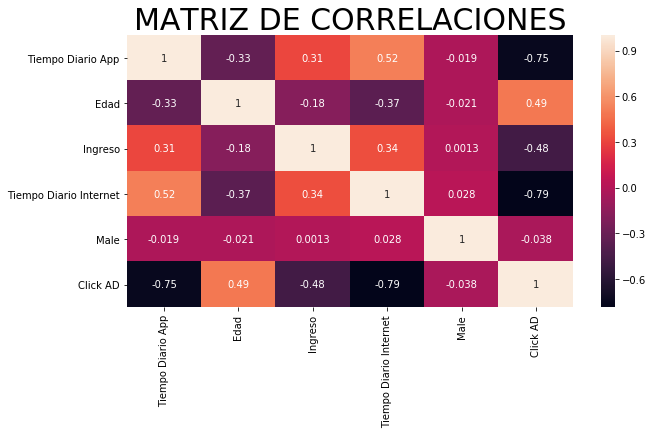

In [43]:
plt.figure(figsize=(10,5))
plt.title("MATRIZ DE CORRELACIONES", fontsize=30)
sns.heatmap(data.corr(), annot=True)

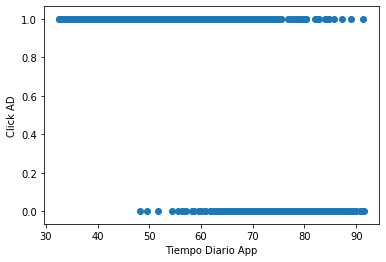

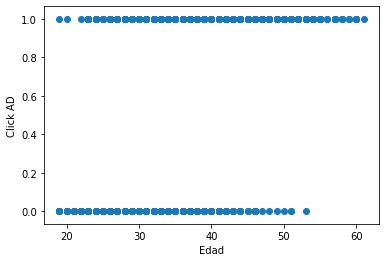

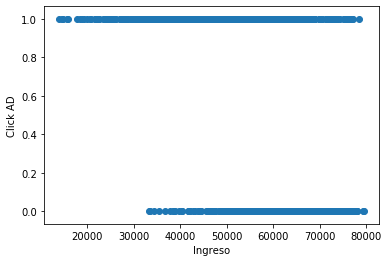

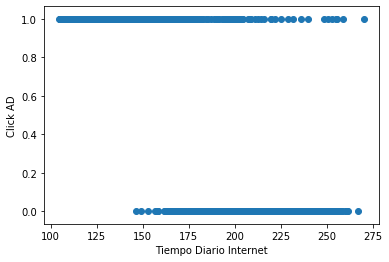

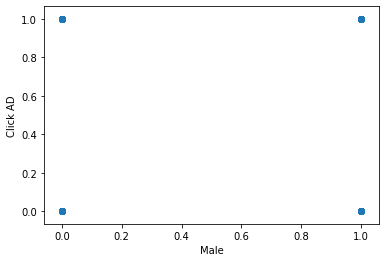

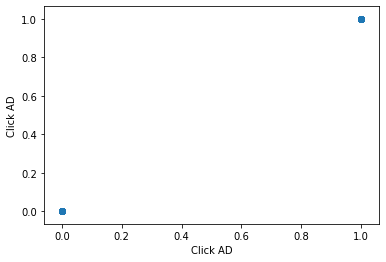

In [45]:
plt.figure()
for x in data.columns.tolist():
    plt.scatter(data[x],data["Click AD"])
    plt.xlabel(str(x))
    plt.ylabel("Click AD")
    plt.show()

In [60]:
probs = logit.predict()
probs.shape

(1000,)

In [78]:
prob=probs
prob_df = pd.DataFrame(prob)
threshold = 0.5
prob_df["prediction"] = np.where(prob_df[0]>=threshold, 1, 0)
prob_df["actual"] = list(y)
prob_df

,0,prediction,actual
0,0.089894,0,0
1,0.077410,0,0
2,0.014760,0,0
3,0.024413,0,0
4,0.151369,0,0
5,0.017968,0,0
6,0.058587,0,0
7,0.993875,1,1
8,0.044137,0,0
9,0.013607,0,0


In [79]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual, margins=True)
confusion_matrix

actual,0,1,All
prediction,,,
0,466,68,534
1,34,432,466
All,500,500,1000


In [72]:
TN=confusion_matrix[0][0]
TP=confusion_matrix[1][1]
FN=confusion_matrix[0][1]
FP=confusion_matrix[1][0]

In [73]:
pd.crosstab(data["Click AD"], "numero")

col_0,numero
Click AD,
0,500
1,500


In [74]:
466 + 432

898

In [75]:
898/1000

0.898